# 프로젝트: 인물 모드 문제점 찾기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

## Step 1. Try Person Mode

- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [46]:
img_origs = []

for i in range(1,4):

    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image' + str(i) +'.jpg'  
    img_orig = cv2.imread(img_path) 
    img_origs.append(img_orig)
    
#     print(img_orig.shape)
#     plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
#     plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f6200bc01f0>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [6]:
# 모델에 이미지를 입력하기

img_path_1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image' + str(1) +'.jpg'  
img_path_2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image' + str(2) +'.jpg'
img_path_3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/csc_image' + str(3) +'.jpg'


segvalues_1, output_1 = model.segmentAsPascalvoc(img_path_1)
segvalues_2, output_2 = model.segmentAsPascalvoc(img_path_2)
segvalues_3, output_3 = model.segmentAsPascalvoc(img_path_3)


segvalues_list = [segvalues_1,segvalues_2,segvalues_3]
outputs = [output_1, output_2,output_3]

In [7]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [8]:
for i in segvalues_list:
    print(i)

{'class_ids': array([ 0,  9, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}
{'class_ids': array([ 0,  9, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}
{'class_ids': array([ 0,  9, 15, 18]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, Fals

In [9]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [11]:
# 사람을 나타내는 15번째 색상은 무엇인지 확인하기
#BGR
print(colormap[15]) 

#RGB로 바꾸기
seg_color = (128,128,192)
print(seg_color)

[192 128 128]
(128, 128, 192)


(1472, 1104)


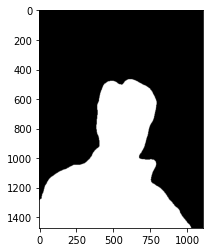

(1472, 1104)


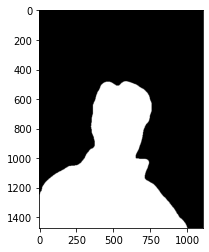

(1472, 1104)


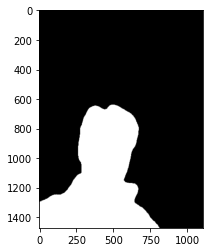

In [12]:
seg_maps = []

for output in outputs:
    
    seg_map = np.all(output==seg_color, axis=-1)
    seg_maps.append(seg_map)
    
    print(seg_map.shape)
    plt.imshow(seg_map, cmap='gray')
    plt.show()

In [47]:
img_masks = []
color_masks = []

for img_orig, seg_map in zip(img_origs, seg_maps):

    # 원 이미지와 겹쳐서 세그멘테이션이 잘 되는지 보기
    img_show = img_orig.copy()

    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    img_masks.append(img_mask)
    
    # 255와 0을 적당한 색상으로 바꿔봅니다
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    color_masks.append(color_mask)
    
    # 원본 이미지와 마스트를 적당히 합쳐봅니다
    # 0.6과 0.4는 두 이미지를 섞는 비율입니다.
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

#     plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
#     plt.show()

In [48]:
# blur 
imgs_orig_blur = []

for img_orig in img_origs:
    img_orig_blur = cv2.blur(img_orig, (70,70))  # 15,15 / 35,35 / 70,70 test
    imgs_orig_blur.append(img_orig_blur)
    
#     plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
#     plt.show()

print(len(imgs_orig_blur))

3


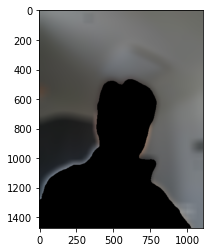

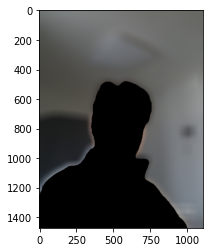

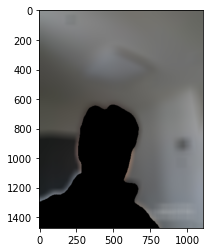

In [15]:
# extract background
img_bg_blurs = []
img_mask_colors = []
for img_orig_blur, img_mask in zip(imgs_orig_blur, img_masks):
    
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_mask_colors.append(img_mask_color)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    img_bg_blurs.append(img_bg_blur)
    plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
    plt.show()

In [49]:
# concat background and human

for img_orig, img_mask_color, img_bg_blur in zip(img_origs, img_mask_colors, img_bg_blurs):

    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
#     plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
#     plt.show()

## Step 1-2. Try Animal picture

(1024, 872, 3)


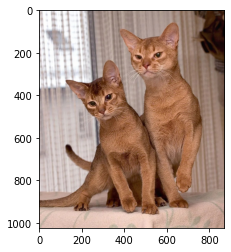

In [17]:
# Abyssinian Cat
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/Abyssinian Cat.jpg'  
img_cat = cv2.imread(img_path) 

print(img_cat.shape)
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [19]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [20]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

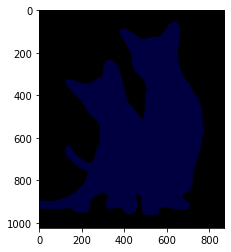

In [21]:
plt.imshow(output)
plt.show()

In [22]:
segvalues 

for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [23]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
colormap[8]

array([64,  0,  0])

In [25]:
seg_color = (0, 0, 64)

(1024, 872)


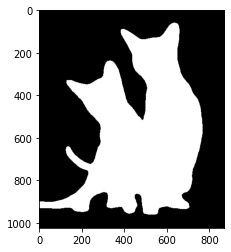

In [26]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray') # ocean, gray, Accent, Blues, twilight
plt.show()

(1024, 872, 3)
(1024, 872, 3)


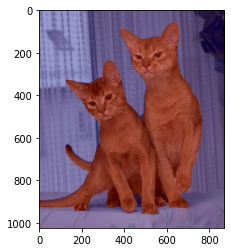

In [27]:
img_show = img_cat.copy()
print(img_show.shape)

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
print(color_mask.shape)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

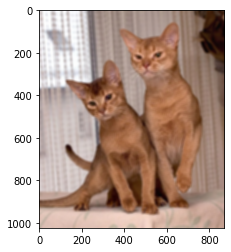

In [28]:
img_orig_blur = cv2.blur(img_cat, (13,13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

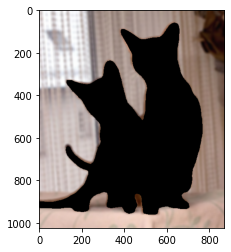

In [29]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

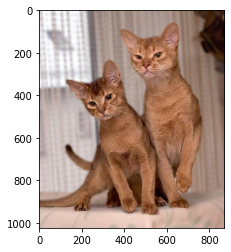

In [30]:
img_concat = np.where(img_mask_color==255, img_cat, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## Step 1-3. Try chroma-key photography

In [31]:
# 이미지 1개 그리기
def draw_img(img, img_title='', cmap=None):
    print(img.shape)

    plt.imshow(img, cmap)
    plt.title(img_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

In [32]:
# 이미지 2개 그리기
def draw_imgs(img_1, img_2, img_1_title='', img_2_title=''):
    plt.figure(figsize=(12,8))

    plt.subplot(211)
    plt.imshow(img_1)
    plt.title(img_1_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.subplot(212)
    plt.imshow(img_2)
    plt.title(img_2_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

(1024, 872, 3)
(853, 1280, 3)


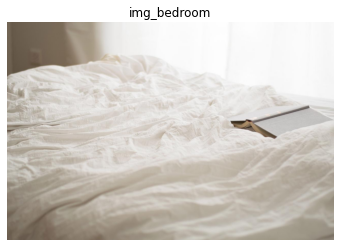

In [33]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/bedroom.jpg'  
img_bedroom = cv2.imread(img_path) 

print(img_cat.shape)
draw_img(cv2.cvtColor(img_bedroom, cv2.COLOR_BGR2RGB), 'img_bedroom')

In [34]:
print(img_bedroom.shape)
print(img_cat.shape)
print(img_mask_color.shape)

(853, 1280, 3)
(1024, 872, 3)
(1024, 872, 3)


In [39]:
img_mask_color = cv2.resize(img_mask_color, (1280, 853))
img_cat = cv2.resize(img_cat, (1280, 853))
print(img_bedroom.shape)
print(img_cat.shape)
print(img_mask_color.shape)

(853, 1280, 3)
(853, 1280, 3)
(853, 1280, 3)


In [40]:
# 고양이만 남기고 배경을 0(검은색) 처리
cat_only_img_concat = np.where(img_mask_color==255, img_cat, 0)

# 고양이 resize
h, w, c = cat_only_img_concat.shape
cat_img_resize = cv2.resize(cat_only_img_concat, (w//4, h//4), cv2.INTER_AREA)

(213, 320, 3)


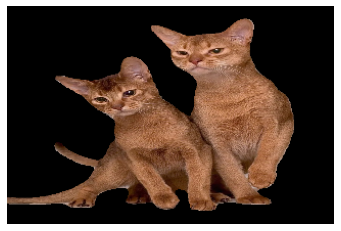

In [41]:
draw_img(cv2.cvtColor(cat_img_resize, cv2.COLOR_BGR2RGB))

In [42]:
back_img_show = img_bedroom.copy()

refined_y = 200
refined_x = 400

alpha = 0.2  # 투명도
sticker_area = back_img_show[refined_y:refined_y+cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]]
back_img_show[refined_y:refined_y +cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]] = \
cv2.addWeighted(sticker_area, alpha, np.where(cat_img_resize==0,sticker_area,cat_img_resize).astype(np.uint8), 1-alpha, 0)

(853, 1280, 3)


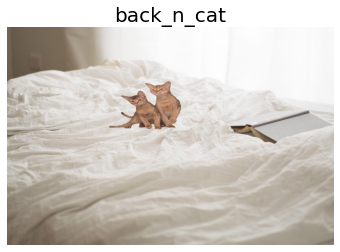

In [43]:
draw_img(cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'back_n_cat')

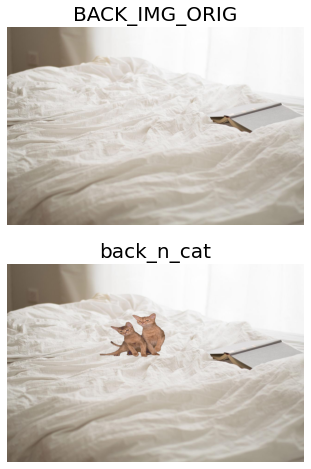

In [44]:
draw_imgs(cv2.cvtColor(img_bedroom, cv2.COLOR_BGR2RGB), cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'BACK_IMG_ORIG', 'back_n_cat')

## step2. Find a problem in a picture

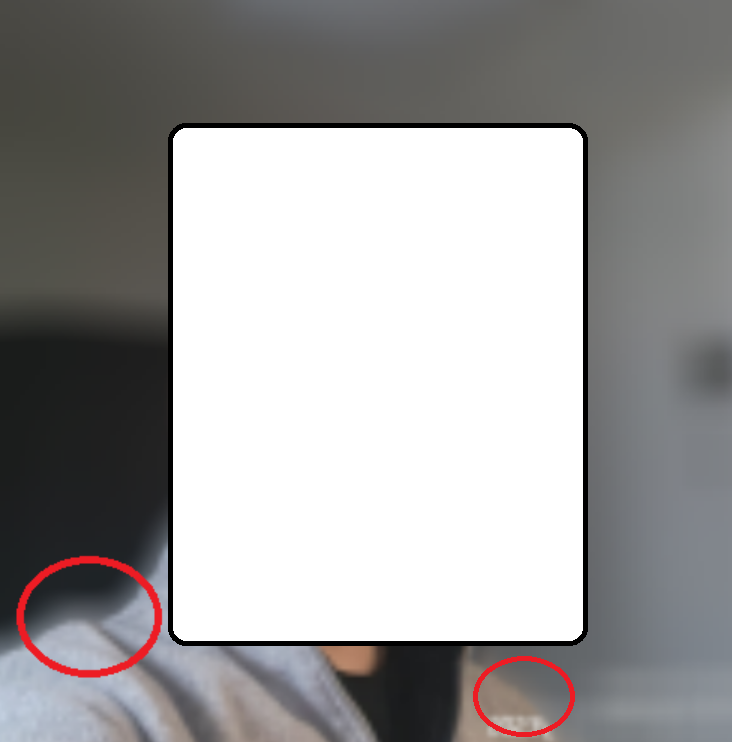

인물의 윤곽선이 배경과 합쳐지면서 흐려지는 문제가 발생하였다.

## step3. 해결방법을 제안해 보기

- 엣지 강화(Edge Enhancement): Sobel 연산자나 Canny 엣지 디텍터와 같은 엣지 감지 알고리즘을 사용하여 이미지의 윤곽선을 강조할 수 있습니다.   
   
   
- 마스킹(Masking): 피사체와 배경을 분리하기 위해 이미지 세그멘테이션 기술을 사용할 수 있습니다. 이를 통해 배경에만 블러 효과를 적용하고 피사체의 윤곽선을 보존할 수 있습니다.   
   
   
- 컨투어 추적(Contour Tracking): findContours 함수를 사용하여 피사체의 윤곽선을 찾고, drawContours 함수로 윤곽선을 그린 다음 이를 마스크로 사용하여 배경 블러와 합성할 수 있습니다.   
   
   
- GrabCut 알고리즘: 배경과 피사체를 분리하는 데 GrabCut 알고리즘을 사용할 수 있습니다. 이 알고리즘은 사용자가 대략적으로 피사체를 지정하면, 나머지 이미지에서 피사체를 정교하게 분리해줍니다.   
   
   
- 가우시안 블러(Gaussian Blur) 조절: GaussianBlur 함수의 커널 크기를 조절하여 블러 효과의 강도를 섬세하게 조절할 수 있습니다. 블러를 적용할 때 엣지 주변의 영역을 보호하려면, 윤곽선 주변에 마스크를 적용해야 합니다.   
   
   
- Bilateral 필터: 엣지를 보존하면서 이미지를 부드럽게 만들고 싶을 때는 bilateralFilter를 사용할 수 있습니다. 이 필터는 엣지 주변의 픽셀 값 차이를 고려하여 엣지를 유지하면서 이미지를 스무딩합니다.   
   
   
- 커스텀 필터: OpenCV의 filter2D 함수를 사용하여 사용자 정의 필터를 만들어 엣지를 강조하거나 보존하는 등의 복잡한 처리를 할 수 있습니다.   

**Semantic segmentation mask의 오류를 보완할 수 있는 솔루션과 이유 설명**

Semantic segmentation mask란 이미지의 각 픽셀이 어떤 클래스에 속하는지를 표현하는 맵입니다. 예를 들어, 아래 그림은 사람, 자동차, 트램, 신호등, 표지판, 나무, 도로 등으로 이미지가 분할된 것을 보여줍니다.

Semantic segmentation mask의 오류는 다음과 같은 원인으로 발생할 수 있습니다.

- 데이터 세트의 품질 문제: 데이터 세트에 노이즈가 많거나, 라벨링이 잘못되거나, 클래스 분포가 불균형하거나, 다양성이 부족한 경우, 모델의 성능이 저하될 수 있습니다. 이를 보완하기 위해서는 데이터 세트를 정제하고, 라벨링을 수정하고, 데이터 증강을 통해 다양한 케이스를 학습할 수 있도록 해야 합니다.
- 모델의 구조 문제: 모델의 구조가 너무 간단하거나, 너무 복잡하거나, 적절한 특성을 추출하지 못하거나, 과적합이나 과소적합이 발생하는 경우, 모델의 성능이 저하될 수 있습니다. 이를 보완하기 위해서는 모델의 구조를 적절하게 설계하고, 하이퍼파라미터를 튜닝하고, 정규화나 드롭아웃과 같은 방법을 적용해야 합니다.
- 손실 함수나 평가 지표의 문제: 손실 함수나 평가 지표가 모델의 목적과 일치하지 않거나, 적절한 가중치를 부여하지 못하거나, 민감하거나 둔감한 경우, 모델의 성능이 저하될 수 있습니다. 이를 보완하기 위해서는 손실 함수나 평가 지표를 적절하게 선택하고, 클래스별로 가중치를 부여하고, 임계값을 조정해야 합니다.

Semantic segmentation mask의 오류를 보완하는 솔루션과 이유에 대해 간단히 요약하면 다음과 같습니다.

- 데이터 세트의 품질 향상: 데이터 세트를 정제하고, 라벨링을 수정하고, 데이터 증강을 통해 모델의 학습 데이터의 품질과 다양성을 높여줍니다.
- 모델의 구조 최적화: 모델의 구조를 적절하게 설계하고, 하이퍼파라미터를 튜닝하고, 정규화나 드롭아웃과 같은 방법을 적용하여 모델의 특성 추출 능력과 일반화 능력을 높여줍니다.
- 손실 함수나 평가 지표의 선택 및 조정: 손실 함수나 평가 지표를 모델의 목적과 일치하게 선택하고, 클래스별로 가중치를 부여하고, 임계값을 조정하여 모델의 학습 방향과 성능 평가 기준을 적절하게 설정해줍니다.



### 출처

- https://m.blog.naver.com/sees111/222366804864
- https://m.blog.naver.com/jokercsi1/222544927280
- https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html
- https://bskyvision.com/entry/semantic-segmentation%EC%9D%98-%EC%9D%98%EB%AF%B8%EC%99%80-%EB%AA%A9%EC%A0%81.
- https://tech.socarcorp.kr/data/2020/02/13/car-damage-segmentation-model.html.
- https://blog.testworks.co.kr/semantic-segmentation-tech-and-learning-method-through-deep-learning/.
- https://ai.googleblog.com/2017/10/portrait-mode-on-pixel-2-and-pixel-2-xl.html.
- http://machinelearningkorea.com/2019/07/13/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B3%84-%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9C/.

## Rubric

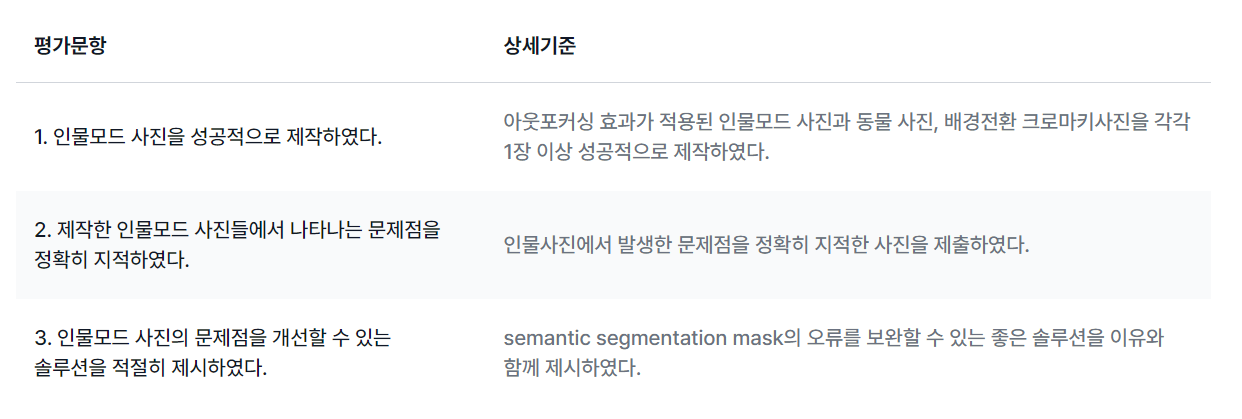

# Retrospect

1. 이번 프로젝트에서 루브릭 기준에 맞추기 위해 시도한 것
- 내 사진 3장, 동물 사진, 크로마키 사진을 구현하였음   
- 인물사진에서 피사체와 배경간에 경계선이 뚜렷한 윤곽선이 존재함을 확인하였다.
- Semantic segmentation mask의 오류를 보완할 수 있는 솔루션과 이유를 제시함
   
2. 이번 프로젝트에서 어려웠던 점   
블러 & 아웃포커싱효과는 앞서 배운 실습 코드로 배워 함수와 흐름에 대해 집중적으로 공부를 했다면, 크로마키 효과의 경우 고양이 이미지에서 고양이만 남기고 배경을 검은색으로 처리하는 방법이나 배경 그림과 고양이 사진과의 이미지 크기를 맞추는 방법을 구현하는 부분이 어려웠고, 해결하지 못한 부분은 조사하고 공부하면서 알게 되었다. 다른 사람들이 구현한 코드를 그대로 긁어온다고 끝이 아니라 np.where의 인자가 무엇인지 노드에서 글로 설명되었던 부분을 여러인자를 바꿔가면서 테스트를 진행하며 정확히 무엇인지 시각적으로 알게되었고, concat도 단순히 함수만 쓰는게 아닌 문법에 맞게 쓰는 방법을 알게 되어 여러모로 많은 것들을 배울 수 있는 공부였다.